In [1]:
#import reequired libraries 

import pandas as pd
import numpy as np
import nltk
import string
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
stopword = nltk.corpus.stopwords.words('english')
wn = nltk.PorterStemmer()

#Reading Training data and store it into a dataframe 

dataset = pd.read_excel('TrainingData.xlsx')
dataset = dataset[0:80000]

In [2]:
#Number of target Classes
print("Number of Run by wickets {} ".format(len(dataset[dataset['Target']=='Run_Bw_Wickets'])))
print("Number of Dot {} ".format(len(dataset[dataset['Target']=='Dot'])))
print("Number of wicket {} ".format(len(dataset[dataset['Target']=='Wicket'])))
print("Number of Boundary {} ".format(len(dataset[dataset['Target']=='Boundary'])))

Number of Run by wickets 33876 
Number of Dot 33617 
Number of wicket 2951 
Number of Boundary 9556 


In [3]:
#Number of null values 
print("Number of null values in Target column {} ".format(dataset['Target'].isnull().sum()))
print("Number of null values in Commentary column {} ".format(dataset['Commentary'].isnull().sum()))

Number of null values in Target column 0 
Number of null values in Commentary column 0 


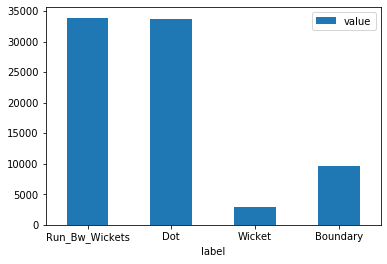

In [4]:
k=dataset.Target.unique()
wickets = dataset['Target'][dataset['Target']=='Wicket'].count()
runs = dataset['Target'][dataset['Target']=='Run_Bw_Wickets'].count()
dots = dataset['Target'][dataset['Target']=='Dot'].count()
boundary= dataset['Target'][dataset['Target']=='Boundary'].count()
df = pd.DataFrame({'label':k,'value':[runs,dots,wickets,boundary]})
ax=df.plot.bar(x='label',y='value',rot=0)

In [5]:
# Function for cout punctuation 
def count_punc(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text)-text.count(" ")),3)*100
dataset['body len'] = dataset['Commentary'].apply(lambda x : len(x)-x.count(" "))
dataset['punct%']=dataset['Commentary'].apply(lambda x:count_punc(x))

In [6]:
#Basic function for cleaning of data Stemming and Tokenizing 
def clean_text(text):
    text ="".join([char for char in text if char not in string.punctuation])
    tokens=re.split('\W+',text)
    text = [wn.stem(word) for word in tokens if word not in stopword]
    return text

#cleaning of train data
tf = TfidfVectorizer(analyzer=clean_text,max_features=100)
x_tfidf = tf.fit_transform(dataset['Commentary'])

In [7]:
X_features = pd.concat([dataset['body len'], dataset['punct%'], pd.DataFrame(x_tfidf.toarray())], axis=1)
X_features.head()

,body len,punct%,0,1,2,3,4,5,6,7,...,90,91,92,93,94,95,96,97,98,99
0,118,1.7,0.120717,0.000000,0.0,0.0,0.000000,0.0,0.324676,0.0,...,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000
1,86,2.3,0.133880,0.258387,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000
2,47,6.4,0.133916,0.258457,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.545753,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000
3,113,5.3,0.096491,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.470184
4,163,4.9,0.074320,0.143436,0.0,0.0,0.307013,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.31874,0.0,0.0,0.0,0.0,0.0,0.000000


In [8]:
#Reading test data into a dataframe 
testdata = pd.read_excel('CCC_TestData.xlsx')

In [9]:
#cleaning of test data
testdata['body_len'] = testdata['Commentary'].apply(lambda x: len(x) - x.count(" "))
testdata['punct%'] = testdata['Commentary'].apply(lambda x: count_punc(x))
testdata['Stemming']=testdata["Commentary"].apply(lambda x:clean_text(x.lower()))

#Vectorizing the data
ptfidf_vect = TfidfVectorizer(analyzer=clean_text , max_features=100)
pX_tfidf = tf.fit_transform(testdata['Commentary'])

pX_features =  pd.concat([testdata['body_len'],testdata['punct%'],pd.DataFrame(pX_tfidf.toarray())],axis=1)
pX_features.head()

,body_len,punct%,0,1,2,3,4,5,6,7,...,90,91,92,93,94,95,96,97,98,99
0,90,4.4,0.104803,0.203827,0.0,0.0,0.0,0.0,0.0,0.0,...,0.425827,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.514569
1,40,7.5,0.121774,0.236834,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.50638,0.000000
2,54,5.6,0.092972,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.456480
3,105,3.8,0.178321,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000
4,128,3.9,0.081538,0.158581,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.585141,0.00000,0.000000


In [10]:
# Spliting up training data into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X_features, dataset['Target'], test_size=0.2)

In [11]:
# Defining classifier model
rf = RandomForestClassifier(n_estimators=50, max_depth=20, n_jobs=-1,class_weight='balanced')

# Train the model
rf_model = rf.fit(X_train, y_train)

In [12]:
sorted(zip(rf_model.feature_importances_, X_train.columns), reverse=True)[0:10]

[(0.2641939592662946, 'body len'),
 (0.09245683469929959, 0),
 (0.051781794950050045, 13),
 (0.03479169239432009, 22),
 (0.029961625588563648, 'punct%'),
 (0.02661009802951321, 1),
 (0.022392948741641116, 21),
 (0.018362556493188336, 86),
 (0.01570028005453486, 48),
 (0.014936501454542086, 8)]

In [13]:
# Generate Predictions on Train data
y_pred = rf_model.predict(X_test)

#Evaluating the model
precision, recall, fscore, support = score(y_test, y_pred, average='weighted')

In [14]:
print('Precision: {} / Recall: {}/fscore: {} / Accuracy: {}'.format(round(precision, 3),
                                                        round(recall, 3),round(fscore, 3),
                                                        round((y_pred==y_test).sum() / len(y_pred),3)))

Precision: 0.719 / Recall: 0.688/fscore: 0.695 / Accuracy: 0.688


In [15]:
# Generate Predictions on Test data
py_pred = rf_model.predict(pX_features)

In [16]:
#Preparing Submission File
submission_DF = pd.DataFrame({'ID': testdata["ID"], 'Target': py_pred})

# Write the submission data frame to a file
submission_DF.to_excel("output.xlsx",index = None)